## <span style="font-family: Arial; font-weight:bold;font-size:1.25em;color:#00b3e5;">Domain:  E-commerce

### <span style="font-family: Arial; font-weight:bold;font-size:1.25em;color:#00b3e5;">Context:
<font color=darkblue>Everyday a million products are being recommended to users based on popularity and other metrics on e-commerce websites. The most popular e-commerce website boosts average order value by 50%, increases revenues by 300%, and improves conversion. In addition to being a powerful tool for increasing revenues, product recommendations are so essential that customers now expect to see similar features on all other eCommerce sites.</font> 

### <span style="font-family: Arial; font-weight:bold;font-size:1.25em;color:#00b3e5;">Attribute Information:
<font color=darkblue>
<b>userId :</b> User Identifier Code
<br><b>productId :</b> Prodiuct Identifier Code
<br><b>ratings :</b> Ratings given on products by users
<br><b>timestamp :</b> date/time of rating given
</font> 

### <span style="font-family: Arial; font-weight:bold;font-size:1.25em;color:#00b3e5;">Learning Outcomes:
<font color=darkblue>
<ul>
<li>Exploratory Data Analysis</li>
<li>Data Wrangling</li>
<li>Build a Popularity Recommender <Model</li>
<li>Build Collaborative Filtering <Model</li>
</ul>
</font> 

### <span style="font-family: Arial; font-weight:bold;font-size:1.25em;color:#00b3e5;">Objective:
<font color=darkblue>To make a recommendation system that recommends at least five(5) new products based on the user's habits.</font>

### <span style="font-family: Arial; font-weight:bold;font-size:1.25em;color:#00b3e5;">Import the necessary libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sns.set()
%matplotlib inline

from collections import defaultdict

from surprise import Dataset
from surprise import Reader
from surprise.model_selection import train_test_split
from surprise import KNNWithMeans
from surprise import accuracy
from surprise import SVD

import os
import warnings
warnings.filterwarnings('ignore')

### <span style="font-family: Arial; font-weight:bold;font-size:1.25em;color:#00b3e5;">Read the data

In [2]:
column_names = ['UserId', 'ProductId', 'Rating', 'Timestamp']

ratings_ecommerce_df = pd.read_csv("ratings_electronics.csv")
ratings_ecommerce_df.columns = column_names


In [3]:
ratings_ecommerce_df.head(10)

,UserId,ProductId,Rating,Timestamp
0,A2CX7LUOHB2NDG,0321732944,5.0,1341100800
1,A2NWSAGRHCP8N5,0439886341,1.0,1367193600
2,A2WNBOD3WNDNKT,0439886341,3.0,1374451200
3,A1GI0U4ZRJA8WN,0439886341,1.0,1334707200
4,A1QGNMC6O1VW39,0511189877,5.0,1397433600
5,A3J3BRHTDRFJ2G,0511189877,2.0,1397433600
6,A2TY0BTJOTENPG,0511189877,5.0,1395878400
7,A34ATBPOK6HCHY,0511189877,5.0,1395532800
8,A89DO69P0XZ27,0511189877,5.0,1395446400
9,AZYNQZ94U6VDB,0511189877,5.0,1401321600


In [4]:
ratings_ecommerce_df.tail(10)

,UserId,ProductId,Rating,Timestamp
7824471,A5FUA9HEV2O42,BT008UKTMW,5.0,1405987200
7824472,A84WRQR47OOKR,BT008UKTMW,1.0,1401753600
7824473,A180UGKKYCPDH0,BT008UKTMW,5.0,1369353600
7824474,A2R6Q6KJCYSVH7,BT008UKTMW,3.0,1343520000
7824475,A2IGIIABRZ5LAB,BT008UKTMW,5.0,1356739200
7824476,A2YZI3C9MOHC0L,BT008UKTMW,5.0,1396569600
7824477,A322MDK0M89RHN,BT008UKTMW,5.0,1313366400
7824478,A1MH90R0ADMIK0,BT008UKTMW,4.0,1404172800
7824479,A10M2KEFPEQDHN,BT008UKTMW,4.0,1297555200
7824480,A2G81TMIOIDEQQ,BT008V9J9U,5.0,1312675200


In [5]:
ratings_ecommerce_df.dtypes

UserId        object
ProductId     object
Rating       float64
Timestamp      int64
dtype: object

#### <span style="font-family: Arial; font-weight:bold;font-size:1.25em;color:#00b3e5;">Observation :
<font color=darkblue>
<br><b>UserId :</b> User Identifier, each user identified with unique user id
<br><b>ProductId :</b> Product Identified, each product identified with unique product id
<br><b>Rating :</b> Rating for a given product by a specific user
<br><b>Timestamp :</b> Date/Time of Rating given, we will ignore this column in this project
</font>

### <span style="font-family: Arial; font-weight:bold;font-size:1.25em;color:#00b3e5;">Shape of Data :
<font color=darkblue>
</font>

In [6]:
ratings_ecommerce_df.shape

(7824481, 4)

#### <span style="font-family: Arial; font-weight:bold;font-size:1.25em;color:#00b3e5;">Observation :
<font color=darkblue>
The dataset has 7824481 rows and 9 columns. 
</font>

### <span style="font-family: Arial; font-weight:bold;font-size:1.25em;color:#00b3e5;">Checking presence of Missing Values :
<font color=darkblue>
</font>

In [7]:
ratings_ecommerce_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7824481 entries, 0 to 7824480
Data columns (total 4 columns):
 #   Column     Dtype  
---  ------     -----  
 0   UserId     object 
 1   ProductId  object 
 2   Rating     float64
 3   Timestamp  int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 238.8+ MB


#### <span style="font-family: Arial; font-weight:bold;font-size:1.25em;color:#00b3e5;">Observation :
<font color=darkblue>
Dataset has no missing values in any of the columns
</font>

### <span style="font-family: Arial; font-weight:bold;font-size:1.25em;color:#00b3e5;">Checking presence of Missing Values :
<font color=darkblue>
</font>

In [8]:
ratings_ecommerce_df.isnull().values.any()

False

#### <span style="font-family: Arial; font-weight:bold;font-size:1.25em;color:#00b3e5;">Observation :
<font color=darkblue>
Dataset has no missing values in any of the columns
</font>

### <span style="font-family: Arial; font-weight:bold;font-size:1.25em;color:#00b3e5;">Unique Check :
<font color=darkblue>
</font>

In [9]:
ratings_ecommerce_df.nunique()

UserId       4201696
ProductId     476001
Rating             5
Timestamp       5489
dtype: int64

#### <span style="font-family: Arial; font-weight:bold;font-size:1.25em;color:#00b3e5;">Observation :
<font color=darkblue>
<ul>
<li>unique users in dataset is 4201696</li>
<li>unique products in dataset is 476001</li>
<li>unqiue Rating values is 5</li>
</ul>
</font>

In [10]:
ratings_ecommerce_df.describe()['Rating'].T

count    7.824481e+06
mean     4.012337e+00
std      1.380910e+00
min      1.000000e+00
25%      3.000000e+00
50%      5.000000e+00
75%      5.000000e+00
max      5.000000e+00
Name: Rating, dtype: float64

In [11]:
print('Minimum Rating is : %d' %(ratings_ecommerce_df.Rating.min()))
print('Minimum Rating is : %d' %(ratings_ecommerce_df.Rating.max()))

Minimum Rating is : 1
Minimum Rating is : 5


#### <span style="font-family: Arial; font-weight:bold;font-size:1.25em;color:#00b3e5;">Observation :
<font color=darkblue>
Product Rating range from 1 to 5.
</font>

## <span style="font-family: Arial; font-weight:bold;font-size:1.25em;color:#00b3e5;">1. Exploratory Data Analysis
<font color=darkblue>
</font>

### <span style="font-family: Arial; font-weight:bold;font-size:1.25em;color:#00b3e5;">Univariate Analysis :
<font color=darkblue>
</font>

In [12]:
# function for distribution, frequency plot
def PlotDistribution(aSeries, aLabel):
    plt.figure(figsize=(20,6))
    
    # distplot
    plt.subplot(1, 2, 1)
    plt.title('Distribution Plot', fontsize=14)
    plt.xlabel(aLabel, fontsize=13)
    plt.ylabel('Total number of ratings', fontsize=13)
    sns.distplot(aSeries)
    plt.tick_params(labelsize=13)
    
    # countplot
    plt.subplot(1, 2, 2)
    plt.title('Frequency Plot', fontsize=14)
    plt.xlabel(aLabel, fontsize=13)
    plt.ylabel('Total number of ratings', fontsize=13)
    sns.countplot(aSeries, data=ratings_ecommerce_df)
    plt.tick_params(labelsize=13)
    
    plt.show()


#### <span style="font-family: Arial; font-weight:bold;font-size:1.25em;color:#00b3e5;">Rating Frequency :
<font color=darkblue>
</font>

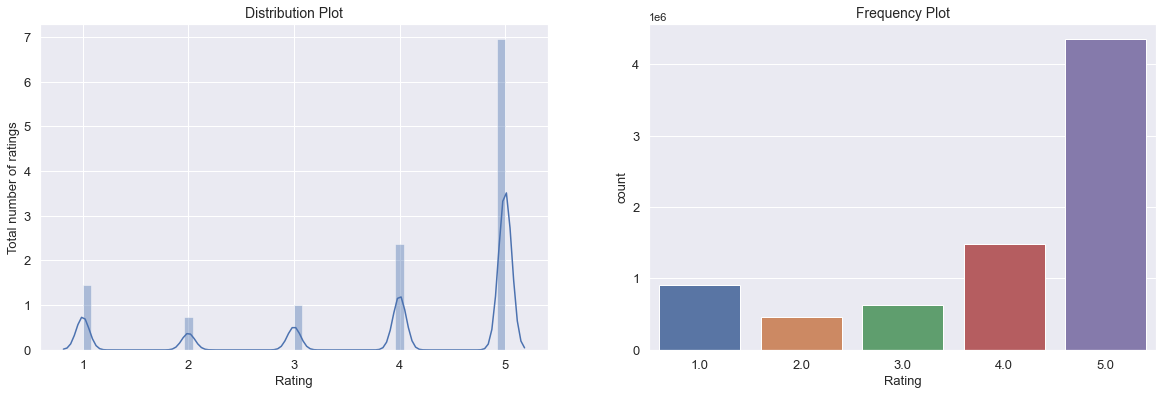

In [13]:
# plot on Rating column
PlotDistribution(ratings_ecommerce_df['Rating'],'Rating')

#### <span style="font-family: Arial; font-weight:bold;font-size:1.25em;color:#00b3e5;">Observation :
<font color=darkblue>
<ul>
<li>Most of the users had given Rating as 5</li>
</ul>
</font>

#### <span style="font-family: Arial; font-weight:bold;font-size:1.25em;color:#00b3e5;">Drop Timestamp :
<font color=darkblue>
</font>

In [14]:
ratings_ecommerce_df.drop(['Timestamp'], axis=1, inplace=True)

#### <span style="font-family: Arial; font-weight:bold;font-size:1.25em;color:#00b3e5;">Observation :
<font color=darkblue>
<ul>
<li>We dropped the Timestamp column as it is not needed</li>
</ul>
</font>

#### <span style="font-family: Arial; font-weight:bold;font-size:1.25em;color:#00b3e5;">Unique Users & Products :
<font color=darkblue>
</font>

In [15]:
print('Number of Ratings : ', ratings_ecommerce_df.shape[0])
print('Number of unique Users : ', len(ratings_ecommerce_df['UserId'].unique()))
print('Number of unique Prodiucts : ', len(ratings_ecommerce_df['ProductId'].unique()))

Number of Ratings :  7824481
Number of unique Users :  4201696
Number of unique Prodiucts :  476001


#### <span style="font-family: Arial; font-weight:bold;font-size:1.25em;color:#00b3e5;">Ratings per Product :
<font color=darkblue>
</font>

In [16]:
rating_product_mean = ratings_ecommerce_df.groupby('ProductId')['Rating'].mean()
rating_product_count = ratings_ecommerce_df.groupby('ProductId')['Rating'].count()
ratings_ecommerce_df_product = pd.DataFrame({'Number of Rating':rating_product_count, 'Mean Rating':rating_product_mean})

In [17]:
ratings_ecommerce_df_product.head()

,Number of Rating,Mean Rating
ProductId,,
0321732944,1,5.000000
0439886341,3,1.666667
0511189877,6,4.500000
0528881469,27,2.851852
0558835155,1,3.000000


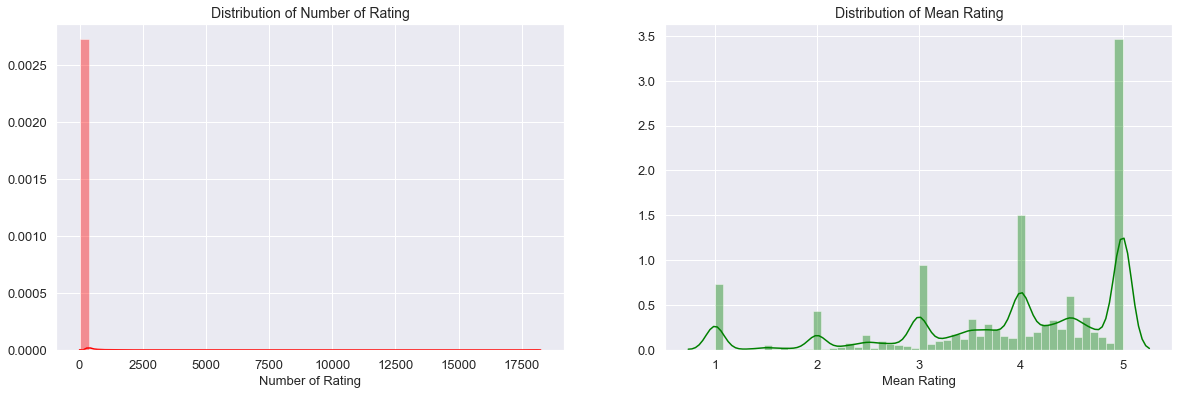

In [18]:
plt.figure(figsize=(20,6))
    
# Count
plt.subplot(1, 2, 1)
plt.title('Distribution of Number of Rating', fontsize=14)
plt.xlabel('Number of Rating', fontsize=13)
sns.distplot(ratings_ecommerce_df_product['Number of Rating'], color='red', kde=True, bins=50)
plt.tick_params(labelsize=13)

# Mean
plt.subplot(1, 2, 2)
plt.title('Distribution of Mean Rating', fontsize=14)
plt.xlabel('Mean Rating', fontsize=13)
sns.distplot(ratings_ecommerce_df_product['Mean Rating'], color='green', kde=True, bins=50)
plt.tick_params(labelsize=13)

plt.show()


#### <span style="font-family: Arial; font-weight:bold;font-size:1.25em;color:#00b3e5;">Observation :
<font color=darkblue>
<ul>
<li>Most of the products has 0 - 100 ratings, some products has ratings upto 1200</li>
<li>Peak rating is 5</li>
</ul>
</font>

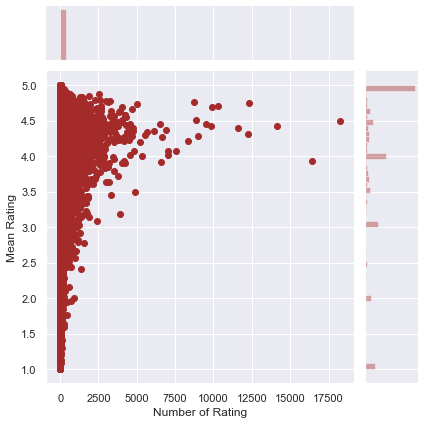

In [19]:
sns.jointplot(x='Number of Rating', y='Mean Rating', data=ratings_ecommerce_df_product, color='brown')

#### <span style="font-family: Arial; font-weight:bold;font-size:1.25em;color:#00b3e5;">Ratings given by User :
<font color=darkblue>
</font>

In [20]:
rating_per_user_count = ratings_ecommerce_df.groupby(by='UserId')['Rating'].count().sort_values(ascending=False)

In [21]:
rating_per_user_count.head()

UserId
A5JLAU2ARJ0BO     520
ADLVFFE4VBT8      501
A3OXHLG6DIBRW8    498
A6FIAB28IS79      431
A680RUE1FDO8B     406
Name: Rating, dtype: int64

In [22]:
rating_per_user_count.describe()

count    4.201696e+06
mean     1.862220e+00
std      2.885110e+00
min      1.000000e+00
25%      1.000000e+00
50%      1.000000e+00
75%      2.000000e+00
max      5.200000e+02
Name: Rating, dtype: float64

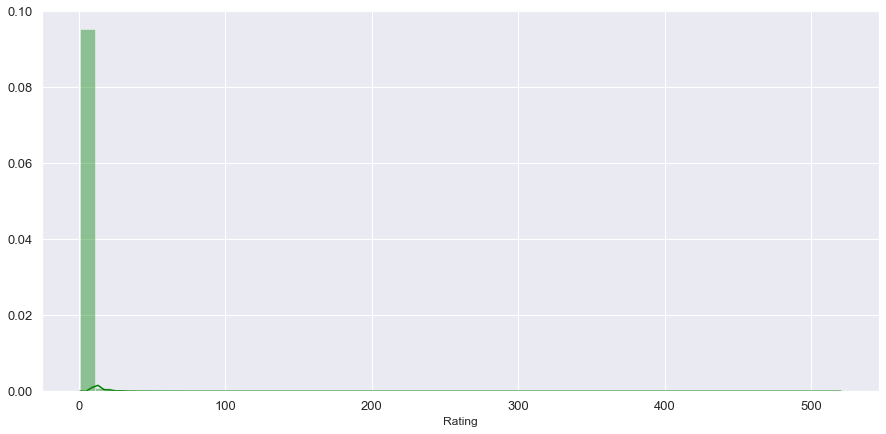

In [23]:
plt.figure(figsize=(15,7))
    
# Count
plt.subplot(1, 1, 1)
sns.distplot(rating_per_user_count, color='green', kde=True, bins=50)
plt.tick_params(labelsize=13)

plt.show()

#### <span style="font-family: Arial; font-weight:bold;font-size:1.25em;color:#00b3e5;">Observation :
<font color=darkblue>
<ul>
<li>Most of the users has given just 1 rating</li>
</ul>
</font>

In [24]:
rating_per_user_quantiles = rating_per_user_count.quantile(np.arange(0,1.01,0.01), interpolation='higher')

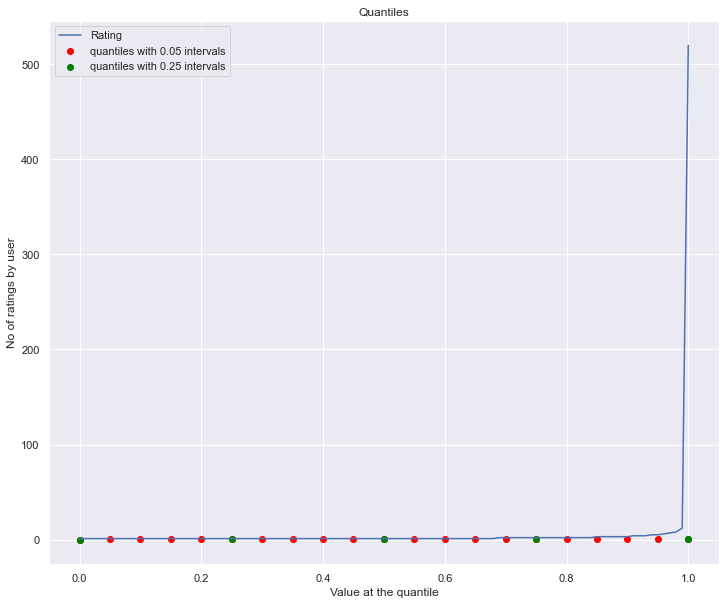

In [25]:
plt.figure(figsize=(12,10))
plt.title('Quantiles')
rating_per_user_quantiles.plot()
plt.scatter(x=rating_per_user_quantiles.index[::5], y=rating_per_user_quantiles.index[::5], 
            color='red', label='quantiles with 0.05 intervals')
plt.scatter(x=rating_per_user_quantiles.index[::25], y=rating_per_user_quantiles.index[::25], 
            color='green', label='quantiles with 0.25 intervals')
plt.ylabel('No of ratings by user')
plt.xlabel('Value at the quantile')
plt.legend(loc='best')
plt.show()


## <span style="font-family: Arial; font-weight:bold;font-size:1.25em;color:#00b3e5;">2. Subset of data to make less sparse/denser
<font color=darkblue>
</font>

In [26]:
rating_per_user_1_count = rating_per_user_count[rating_per_user_count==1].count()
rating_per_user_1_percent = rating_per_user_1_count / rating_per_user_count.count()

In [27]:
print('Total {} percent of Users have given rating just once'.format(rating_per_user_1_percent*100))
print('Total {} number of Users have given rating just once'.format(rating_per_user_1_count))

Total 68.5873751932553 percent of Users have given rating just once
Total 2881833 number of Users have given rating just once


In [28]:
rating_per_user_50_count = rating_per_user_count[rating_per_user_count>=50].count()
rating_per_user_50_percent = rating_per_user_50_count / rating_per_user_count.count()

In [29]:
print('Total {} percent of Users have given rating 50 or more times'.format(rating_per_user_50_percent*100))
print('Total {} number of Users have given rating 50 or more times'.format(rating_per_user_50_count))

Total 0.03665186629399176 percent of Users have given rating 50 or more times
Total 1540 number of Users have given rating 50 or more times


In [30]:
ratings_ecommerce_df_sparsed = ratings_ecommerce_df.groupby('ProductId').filter(lambda x:x['Rating'].count() >= 50)

In [31]:
ratings_ecommerce_df_sparsed.head()

,UserId,ProductId,Rating
182,A1BKC6B7YHYTVV,0972683275,4.0
183,AWVFSIB42LHKJ,0972683275,4.0
184,A36MQBNADRH8YY,0972683275,5.0
185,A3SRXMPLAEZ6DP,0972683275,4.0
186,A20XXTXWF2TCPY,0972683275,5.0


In [32]:
ratings_ecommerce_df_sparsed.shape

(5374313, 3)

In [33]:
print('We consider {} percent of data from original data for analysis'.format(ratings_ecommerce_df_sparsed['UserId'].count()/ratings_ecommerce_df['UserId'].count()*100))

We consider 68.68587194473346 percent of data from original data for analysis


#### <span style="font-family: Arial; font-weight:bold;font-size:1.25em;color:#00b3e5;">Observation :
<font color=darkblue>
<ul>
<li>We consider 68.7% of data from original data for analysis with users given 50 or more rating</li>
</ul>
</font>

## <span style="font-family: Arial; font-weight:bold;font-size:1.25em;color:#00b3e5;">3. Popularity Recommender Model
<font color=darkblue>
</font>

In [34]:
ratings_ecommerce_df_mean_count = pd.DataFrame(ratings_ecommerce_df_sparsed.groupby('ProductId')['Rating'].mean())
ratings_ecommerce_df_mean_count['Rating_Counts'] = pd.DataFrame(ratings_ecommerce_df_sparsed.groupby('ProductId')['Rating'].count())


In [35]:
print('Highest Rating Count : ', ratings_ecommerce_df_mean_count['Rating_Counts'].max())
print('Lowest Rating Count : ', ratings_ecommerce_df_mean_count['Rating_Counts'].min())

Highest Rating Count :  18244
Lowest Rating Count :  50


In [36]:
ratings_ecommerce_df_mean_count.head()

,Rating,Rating_Counts
ProductId,,
0972683275,4.470980,1051
1400501466,3.560000,250
1400501520,4.243902,82
1400501776,3.884892,139
1400532620,3.684211,171


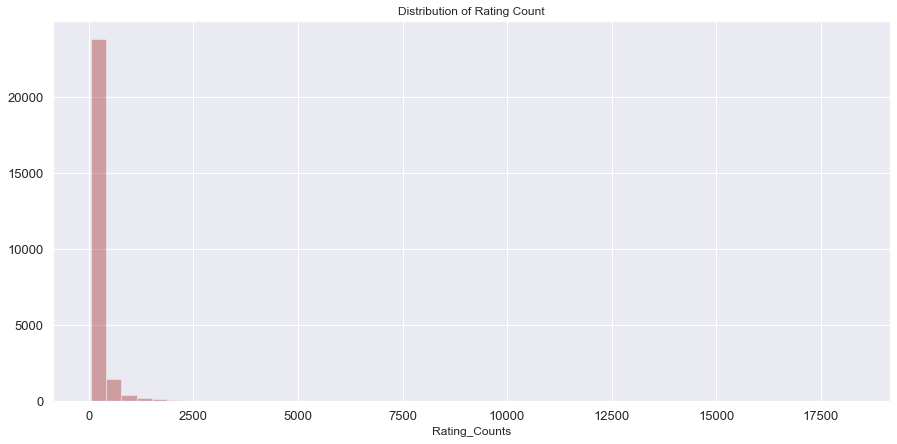

In [37]:
plt.figure(figsize=(15,7))
    
# Rating Count
plt.subplot(1, 1, 1)
plt.rcParams['patch.force_edgecolor']=True
plt.title('Distribution of Rating Count')
sns.distplot(ratings_ecommerce_df_mean_count['Rating_Counts'], color='brown', kde=False, bins=50)
plt.tick_params(labelsize=13)

plt.show()

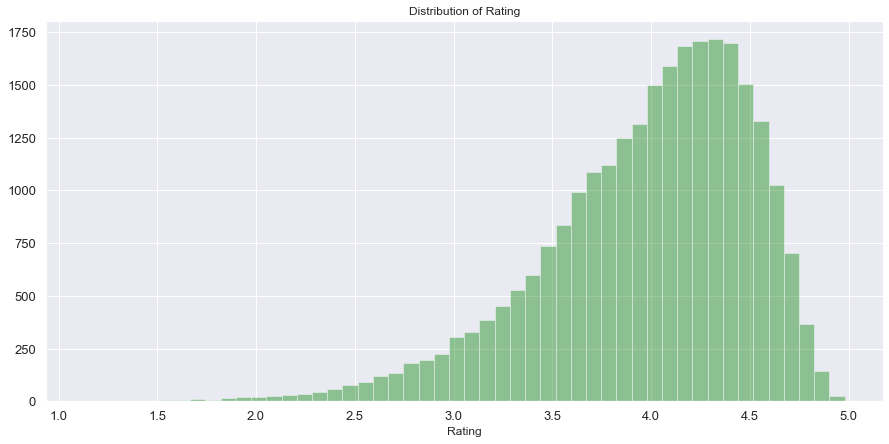

In [38]:
plt.figure(figsize=(15,7))
    
# Rating
plt.subplot(1, 1, 1)
plt.rcParams['patch.force_edgecolor']=True
plt.title('Distribution of Rating')
sns.distplot(ratings_ecommerce_df_mean_count['Rating'], color='green', kde=False, bins=50)
plt.tick_params(labelsize=13)

plt.show()

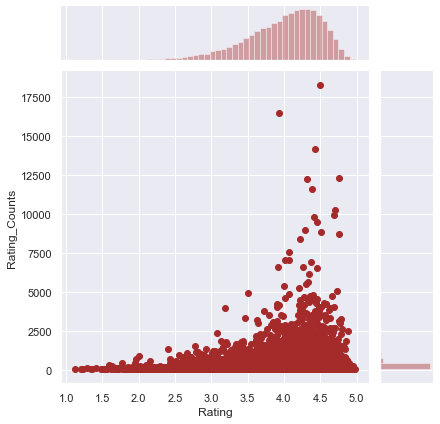

In [39]:
# Rating
plt.rcParams['patch.force_edgecolor']=True
sns.jointplot(x='Rating', y='Rating_Counts', data=ratings_ecommerce_df_mean_count, color='brown')
plt.tick_params(labelsize=13)


In [40]:
ratings_ecommerce_df_popular_products = ratings_ecommerce_df_mean_count.sort_values(['Rating_Counts', 'Rating'], 
                                                                                    ascending=False)


In [41]:
ratings_ecommerce_df_popular_products.head(10)

,Rating,Rating_Counts
ProductId,,
B0074BW614,4.491504,18244
B00DR0PDNE,3.931020,16454
B007WTAJTO,4.424005,14172
B0019EHU8G,4.754497,12285
B006GWO5WK,4.314657,12226
B003ELYQGG,4.392528,11617
B003ES5ZUU,4.704749,10276
B007R5YDYA,4.690926,9907
B00622AG6S,4.420136,9823


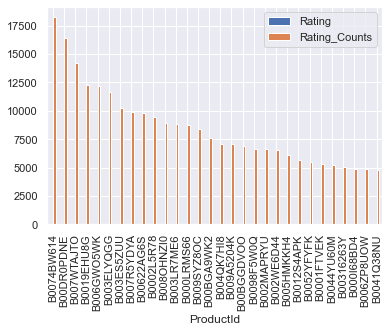

In [42]:
ratings_ecommerce_df_popular_products.head(30).plot(kind='bar')

#### <span style="font-family: Arial; font-weight:bold;font-size:1.25em;color:#00b3e5;">Observation :
<font color=darkblue>
<ul>
<li>Top 30 Products based on their popularity ratings is shown</li>
</ul>
</font>

## <span style="font-family: Arial; font-weight:bold;font-size:1.25em;color:#00b3e5;">4. Split Data into train / test dataset
<font color=darkblue>
</font>

In [43]:
reader = Reader(rating_scale=(1, 5))
data_reader = Dataset.load_from_df(ratings_ecommerce_df_sparsed, reader)

In [44]:
trainset, testset = train_test_split(data_reader, test_size=.30, random_state=1)

## <span style="font-family: Arial; font-weight:bold;font-size:1.25em;color:#00b3e5;">5. Collaborative Filtering Model
<font color=darkblue>
</font>

#### <span style="font-family: Arial; font-weight:bold;font-size:1.25em;color:#00b3e5;">Memory Based Approach :
<font color=darkblue>
</font>

In [45]:
# Use user_based true/false to switch between user-based or item-based collaborative filtering
algo_cf_mem = KNNWithMeans(k=50, sim_options={'name': 'pearson_baseline', 'user_based': False})
algo_cf_mem.fit(trainset)

Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.


In [46]:
test_pred_cf_mem = algo_cf_mem.test(testset)

In [47]:
test_pred_cf_mem

[Prediction(uid='A2SXFH0L3JGU9', iid='B001QNBUA4', r_ui=2.0, est=3.996031746031746, details={'actual_k': 0, 'was_impossible': False}),
 Prediction(uid='A1Q1X71W1C9KKR', iid='B0048IW030', r_ui=4.0, est=4.063374480564824, details={'was_impossible': True, 'reason': 'User and/or item is unknown.'}),
 Prediction(uid='A2WJLP768EMKR2', iid='B009SJNTIY', r_ui=4.0, est=4.225352112676056, details={'actual_k': 0, 'was_impossible': False}),
 Prediction(uid='A26H1ZN85O1EXL', iid='B0029F21LA', r_ui=5.0, est=4.063374480564824, details={'was_impossible': True, 'reason': 'User and/or item is unknown.'}),
 Prediction(uid='AEY6F9T36MYG8', iid='B000NVVDKC', r_ui=1.0, est=4.063374480564824, details={'was_impossible': True, 'reason': 'User and/or item is unknown.'}),
 Prediction(uid='A1VOS9VVNTDT3H', iid='B003ELYQGG', r_ui=5.0, est=4.397907033341445, details={'actual_k': 0, 'was_impossible': False}),
 Prediction(uid='AIGV6RMVQXGFE', iid='B00008VELA', r_ui=5.0, est=2.9464285714285716, details={'actual_k': 0,

In [48]:
# get RMSE
print("Item-based Model : Test Set")
accuracy.rmse(test_pred_cf_mem, verbose=True)

Item-based Model : Test Set
RMSE: 1.3342


1.3342227213782727

#### <span style="font-family: Arial; font-weight:bold;font-size:1.25em;color:#00b3e5;">Observation :
<font color=darkblue>
<ul>
<li>With Memory based approach RSME is 1.33</li>
</ul>
</font>

#### <span style="font-family: Arial; font-weight:bold;font-size:1.25em;color:#00b3e5;">Model Based Approach :
<font color=darkblue>
</font>

In [49]:
algo_cf_svd = SVD()
algo_cf_svd.fit(trainset)

In [50]:
test_pred_cf_svd = algo_cf_svd.test(testset)

In [51]:
# get RMSE
print("Item-based Model : Test Set")
accuracy.rmse(test_pred_cf_svd, verbose=True)

Item-based Model : Test Set
RMSE: 1.2695


1.2695385580753693

#### <span style="font-family: Arial; font-weight:bold;font-size:1.25em;color:#00b3e5;">Observation :
<font color=darkblue>
<ul>
<li>With Model based approach RSME is 1.26</li>
</ul>
</font>

## <span style="font-family: Arial; font-weight:bold;font-size:1.25em;color:#00b3e5;">6. Evaluate the Models
<font color=darkblue>
</font>

#### <span style="font-family: Arial; font-weight:bold;font-size:1.25em;color:#00b3e5;">Evaluate Popularity based Model :
<font color=darkblue>
</font>

In [52]:
ratings_ecommerce_df_popular_products.head(10)

,Rating,Rating_Counts
ProductId,,
B0074BW614,4.491504,18244
B00DR0PDNE,3.931020,16454
B007WTAJTO,4.424005,14172
B0019EHU8G,4.754497,12285
B006GWO5WK,4.314657,12226
B003ELYQGG,4.392528,11617
B003ES5ZUU,4.704749,10276
B007R5YDYA,4.690926,9907
B00622AG6S,4.420136,9823


#### <span style="font-family: Arial; font-weight:bold;font-size:1.25em;color:#00b3e5;">Observation :
<font color=darkblue>
<ul>
<li>Top Product B0074BW614 with 18244 user ratings has average rating of 4.49</li>
</ul>
</font>

#### <span style="font-family: Arial; font-weight:bold;font-size:1.25em;color:#00b3e5;">Evaluate CF Model (Memory based approach) :
<font color=darkblue>
</font>

In [53]:
rmse_cf_mem = accuracy.rmse(test_pred_cf_mem, verbose=True)

RMSE: 1.3342


In [54]:
print('RMSE for Memory Based Collaborative Filtering of all Test data is = {}'.format(rmse_cf_mem))

RMSE for Memory Based Collaborative Filtering of all Test data is = 1.3342227213782727


#### <span style="font-family: Arial; font-weight:bold;font-size:1.25em;color:#00b3e5;">Observation :
<font color=darkblue>
<ul>
<li>RMSE for Memory Based Collaborative Filtering of all Test data is 1.33</li>
</ul>
</font>

#### <span style="font-family: Arial; font-weight:bold;font-size:1.25em;color:#00b3e5;">Evaluate CF Model (SVD Model based approach :
<font color=darkblue>
</font>

In [55]:
rmse_cf_svd = accuracy.rmse(test_pred_cf_svd, verbose=True)

RMSE: 1.2695


In [56]:
print('RMSE for Model (SVD) Based Collaborative Filtering of all Test data is = {}'.format(rmse_cf_svd))

RMSE for Model (SVD) Based Collaborative Filtering of all Test data is = 1.2695385580753693


#### <span style="font-family: Arial; font-weight:bold;font-size:1.25em;color:#00b3e5;">Observation :
<font color=darkblue>
<ul>
<li>RMSE for Model (svd) Based Collaborative Filtering of all Test data is 1.26</li>
</ul>
</font>

## <span style="font-family: Arial; font-weight:bold;font-size:1.25em;color:#00b3e5;">7. Top K (K=5) Recommendations
<font color=darkblue>
</font>

In [57]:
# function to get top n product recommendation for each user
def get_top_n(predictions, n=5):
    # map predictions to each user
    top_n = defaultdict(list)
    for uid, iid, true_r, est, _ in predictions:
        top_n[uid].append((iid, est))
        
    # sort the predictions for each user and get k highest ones
    for uid, user_ratings in top_n.items():
        user_ratings.sort(key=lambda x: x[1], reverse=True)
        top_n[uid] = user_ratings[:n]
        
    return top_n

In [58]:
top_n = get_top_n(test_pred_cf_svd, n=5)

In [59]:
# print recommended items of first 50 users
count=0
for uid, user_ratings in top_n.items():
    print(uid, [iid for (iid, _) in user_ratings])
    if(count>49):
        break
    count=count+1

A2SXFH0L3JGU9 ['B003ES5ZUU', 'B00005T3G0', 'B001QNBUA4', 'B000075UZ7']
A1Q1X71W1C9KKR ['B0048IW030']
A2WJLP768EMKR2 ['B009SJNTIY', 'B00BIULEJC']
A26H1ZN85O1EXL ['B0029F21LA']
AEY6F9T36MYG8 ['B000NVVDKC']
A1VOS9VVNTDT3H ['B003ELYQGG']
AIGV6RMVQXGFE ['B000Q8UAWY', 'B00008VELA']
A19RSE6RJWOYCM ['B0031GGQC6', 'B0088PUEPK']
A2N823Q3BZ46IP ['B008Z2661W']
A2QBTMT4YR5I3A ['B003962DXE']
A1R0TFPX8GO0RL ['B000EXTXSI']
A1DH5ZLKZ1TM0V ['B004LWL9A8', 'B0011E4N2K', 'B003KE3SJI', 'B000MWDIOG']
A1CHRFTYGHQPWJ ['B0001YGIB0']
A1OCRKQM87O8CF ['B001R69DOA']
A39YO0G4G6TRTP ['B005NGQWL2', 'B001715BIC', 'B005P12QME']
AUVZIUQLMZP7L ['B0009H5VVM']
A2PREDH9B7WPK5 ['B00B5HE3UU']
A2ZXOYBMLLDPWP ['B00D02AHEO']
AAUSIU3W3GT5V ['B008CS5QTW']
APMQOY8T1G1M1 ['B00291N83O']
A1S8OSN7OXKE0V ['B00763WKZW']
ALPO9ZL70PZVJ ['B0044YU60M', 'B003SX0P1A', 'B002SW3MP8']
A2BEO5JCPR7BEM ['B0058UUR6E']
A2I7ZZNKHZ2MJR ['B000CKVOOY']
A17RJDSS1X6Y1G ['B0097FM3PE']
A366AX8LU9MEVW ['B0017H4G0A']
ADRDM69WRIM9K ['B00CRFK24K']
A3N0Z0QVRS1PP9 [

#### <span style="font-family: Arial; font-weight:bold;font-size:1.25em;color:#00b3e5;">Observation :
<font color=darkblue>
<ul>
<li>Top 5 product recommendations for first 50 users are shown above</li>
</ul>
</font>

## <span style="font-family: Arial; font-weight:bold;font-size:1.25em;color:#00b3e5;">8. Summary - Insights
<font color=darkblue>
</font>

#### <span style="font-family: Arial; font-weight:bold;font-size:1.25em;color:#00b3e5;">
<font color=darkblue>
<ul>
<li>There were totally 7824481 ratings in dataset</li>
<li>No missing or null values in any of the columns</li>
<li>Most of the users had given Rating as 5</li>
<li>Most of the products has 0 - 100 ratings, some products has ratings upto 1200</li>
<li>Peak rating is 5, Most of the users has given just 1 rating</li>
<li>For our analysis we considered only 68.7% of data with users given 50 or more rating</li>
<li>We built Collaborative Filtering using Memory Based and Model Based, using memory based approach RSME is 1.33 and using model (svd) based approach RSME is 1.26</li>
<li>With 18244 user ratings and average rating of 4.49, Product B0074BW614 stands at top</li>
<li>We got the Top 5 product recommendations</li>
</ul>
</font>

#### <span style="font-family: Arial; font-weight:bold;font-size:1.25em;color:#00b3e5;">Conclusion :
<font color=darkblue>
<ul>
<li>Objective is to make a recommendation system that recommends at least five(5) new products based on the user's habits</li>
<li>There were totally 7824481 ratings in dataset, No missing or null values in any of the columns</li>
<li>For our analysis we sparsed the data and considered only 68.7% of original data with users given 50 or more rating</li>
<li>We built popularity based recommender model</li>
<li>We built Collaborative Filtering using Memory Based and Model Based, using memory based approach RSME is 1.33 and using model (svd) based approach RSME is 1.26</li>
<li>With 18244 user ratings and average rating of 4.49, Product B0074BW614 stands at top</li>
<li>We got the Top 5 product recommendations</li>
</ul>
</font>